# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
temp_units ='imperial'
api_key ='e80b948b744b583baae870250194a510'
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
weather_information_by_city = {}
for index, city in enumerate(cities):
    try:
        response = requests.get(query_url + city.replace(" ", "&")).json()
        cloudiness = response['clouds']['all']
        country = response['sys']['country']
        dt = response['dt']
        humidity = response['main']['humidity']
        max_temperature = response['main']['temp_max']
        lat = response['coord']['lat']
        lon = response['coord']['lon']
        wind_speed = response['wind']['speed']
        weather_information_by_city[city] = {
            'cloudiness': cloudiness,
            'country': country,
            'dt': dt,
            'humidity': humidity,
            'max_temperature': max_temperature,
            'lat': lat,
            'lon': lon,
            'wind_speed': wind_speed
        }
        print('Currently processing city %s with index %s', city, index)
    except requests.exceptions.HTTPError as err:
        print('HTTP Connection error occurred for city %s. Skipping...', city)
        print(err)
    except KeyError as err:
        print('Key error occurred for city %s. Skipping...', city)
        print(err)

Key error occurred for city %s. Skipping... taolanaro
'clouds'
Currently processing city %s with index %s thompson 1
Currently processing city %s with index %s albany 2
Currently processing city %s with index %s northam 3
Currently processing city %s with index %s bluff 4
Currently processing city %s with index %s ushuaia 5
Currently processing city %s with index %s cape town 6
Currently processing city %s with index %s punta arenas 7
Currently processing city %s with index %s chuy 8
Currently processing city %s with index %s richards bay 9
Currently processing city %s with index %s ribeira grande 10
Currently processing city %s with index %s ankpa 11
Currently processing city %s with index %s tuktoyaktuk 12
Currently processing city %s with index %s bulungu 13
Currently processing city %s with index %s oranjemund 14
Currently processing city %s with index %s busselton 15
Currently processing city %s with index %s rikitea 16
Currently processing city %s with index %s alta floresta 17
C

Currently processing city %s with index %s severo-kurilsk 146
Currently processing city %s with index %s bilma 147
Currently processing city %s with index %s puerto baquerizo moreno 148
Key error occurred for city %s. Skipping... gurskoye
'clouds'
Key error occurred for city %s. Skipping... saint george
'clouds'
Currently processing city %s with index %s minas 151
Key error occurred for city %s. Skipping... camana
'clouds'
Currently processing city %s with index %s abu dhabi 153
Currently processing city %s with index %s kirakira 154
Currently processing city %s with index %s tiarei 155
Currently processing city %s with index %s mincivan 156
Currently processing city %s with index %s solntsevo 157
Currently processing city %s with index %s chicama 158
Currently processing city %s with index %s touros 159
Currently processing city %s with index %s puerto leguizamo 160
Currently processing city %s with index %s celendin 161
Currently processing city %s with index %s novo aripuana 162
Cur

Currently processing city %s with index %s nantucket 290
Currently processing city %s with index %s sitka 291
Currently processing city %s with index %s haifa 292
Currently processing city %s with index %s iqaluit 293
Key error occurred for city %s. Skipping... mafinga
'clouds'
Key error occurred for city %s. Skipping... te anau
'clouds'
Currently processing city %s with index %s artyom 296
Currently processing city %s with index %s esso 297
Currently processing city %s with index %s karratha 298
Key error occurred for city %s. Skipping... katsiveli
'clouds'
Key error occurred for city %s. Skipping... labutta
'clouds'
Currently processing city %s with index %s lagoa 301
Currently processing city %s with index %s amapa 302
Currently processing city %s with index %s north bend 303
Currently processing city %s with index %s bejar 304
Currently processing city %s with index %s gore 305
Currently processing city %s with index %s coquimbo 306
Currently processing city %s with index %s vienti

Currently processing city %s with index %s saint-georges 435
Currently processing city %s with index %s delta del tigre 436
Key error occurred for city %s. Skipping... burkhala
'clouds'
Currently processing city %s with index %s salto 438
Currently processing city %s with index %s coihaique 439
Currently processing city %s with index %s ouadda 440
Currently processing city %s with index %s marsh harbour 441
Currently processing city %s with index %s salas 442
Key error occurred for city %s. Skipping... thunder bay
'clouds'
Currently processing city %s with index %s puerto el triunfo 444
Key error occurred for city %s. Skipping... palabuhanratu
'clouds'
Currently processing city %s with index %s zwedru 446
Currently processing city %s with index %s yenagoa 447
Currently processing city %s with index %s grindavik 448
Currently processing city %s with index %s tyukhtet 449
Currently processing city %s with index %s lafia 450
Currently processing city %s with index %s lethem 451
Currently 

Currently processing city %s with index %s athabasca 579
Currently processing city %s with index %s soyo 580
Currently processing city %s with index %s tynda 581
Currently processing city %s with index %s hervey bay 582
Currently processing city %s with index %s san matias 583
Currently processing city %s with index %s merrill 584
Currently processing city %s with index %s havelock 585
Currently processing city %s with index %s metkovic 586
Currently processing city %s with index %s hasaki 587
Currently processing city %s with index %s riverton 588
Currently processing city %s with index %s halifax 589
Currently processing city %s with index %s aligarh 590
Key error occurred for city %s. Skipping... stornoway
'clouds'
Currently processing city %s with index %s kavaratti 592
Currently processing city %s with index %s stillwater 593
Key error occurred for city %s. Skipping... maridi
'clouds'
Currently processing city %s with index %s marsa matruh 595
Currently processing city %s with ind

In [5]:
weatherbycity_df = pd.DataFrame(weather_information_by_city)
weatherbycity_df = weatherbycity_df.T
weatherbycity_df.index.name = 'City'

weatherbycity_df.head()

,cloudiness,country,dt,humidity,lat,lon,max_temperature,wind_speed
City,,,,,,,,
thompson,20,CA,1567226651,93,55.74,-97.86,39.2,0.6
albany,1,US,1567227364,100,42.65,-73.75,63,4.7
northam,40,AU,1567227518,55,-31.65,116.67,64.4,14.99
bluff,1,AU,1567226930,26,-23.58,149.07,77.81,8.84
ushuaia,75,AR,1567227519,74,-54.81,-68.31,37.4,4.7


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#output data to csv
weatherbycity_df.to_csv("weatherbycity.csv", index=False, header=True)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

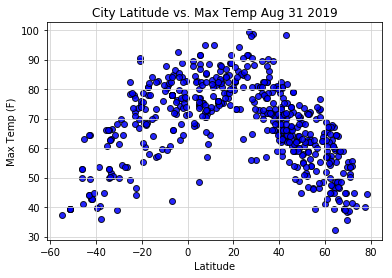

In [11]:
plt.scatter(weatherbycity_df["lat"],weatherbycity_df["max_temperature"], c="blue", alpha=0.85, edgecolor="black")
plt.title("City Latitude vs. Max Temp Aug 31 2019")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey") 
plt.savefig("chart1.png")
plt.show()


#### Latitude vs. Humidity Plot

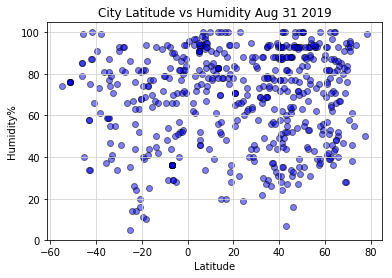

In [12]:
plt.scatter(weatherbycity_df["lat"],weatherbycity_df["humidity"], c="blue", alpha=0.5, edgecolor="black")
plt.title("City Latitude vs Humidity Aug 31 2019")
plt.xlabel("Latitude")
plt.ylabel("Humidity%")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey") 
plt.savefig("chart2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

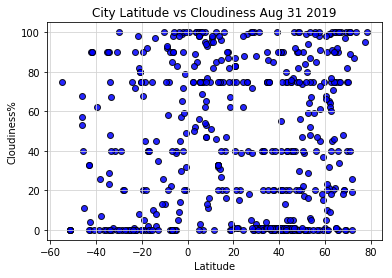

In [13]:
plt.scatter(weatherbycity_df["lat"],weatherbycity_df["cloudiness"], c="blue", alpha=0.85, edgecolor="black")
plt.title("City Latitude vs Cloudiness Aug 31 2019")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness%")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey") 
plt.savefig("chart3.png")
plt.show()


#### Latitude vs. Wind Speed Plot

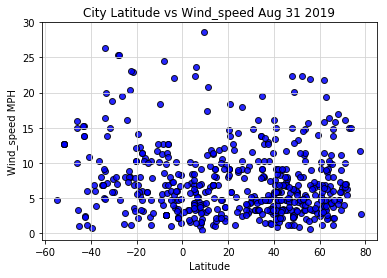

In [14]:
plt.scatter(weatherbycity_df["lat"],weatherbycity_df["wind_speed"], c="blue", alpha=0.85, edgecolor="black")
plt.title("City Latitude vs Wind_speed Aug 31 2019")
plt.xlabel("Latitude")
plt.ylabel("Wind_speed MPH")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey") 
plt.savefig("chart4.png")
plt.show()
